In [1]:
import time
print("Latest update: {} CEST".format(time.strftime("%Y-%m-%d %H:%M")))

Latest update: 2019-07-23 20:42 CEST


## Introduction

This document has the purpose of giving the reader a fast overview of the current market situation. Focus is mainly on the Swedish and US markets.

Please do not hesitate to contact me at lundberg.oscar@gmail.com

Table of contents:

* Index
* Fundamentals
    - Dividend yield
    - P/E ratio
    - Dividend/earnings (payout ratio)
* Appendix
    - Stock traces
    - Dividend months

In [2]:
# @hidden_cell
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
sns.set(font_scale=1.1)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rcParams.update({'font.size': 18})
#%matplotlib inline
%matplotlib notebook

# Helper functions to load data
from lib.load_index_trace import load_index_trace
from lib.get_avanza_fundamentals import get_avanza_fundamentals
from lib.load_stocks_fundamentals import load_stocks_fundamentals
from lib.load_stocks_trace import load_stocks_trace
from lib.load_div_months_csv import load_div_months_csv, load_div_months_plot
from lib.load_div_months_csv import load_div_months_csv_2, load_div_months_plot_2
from lib.get_dividend_aristocrats_df import get_div_artist

# 1 Index

In this section four indices are resented:

* OMXS
* Nasdaq
* S&P500

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


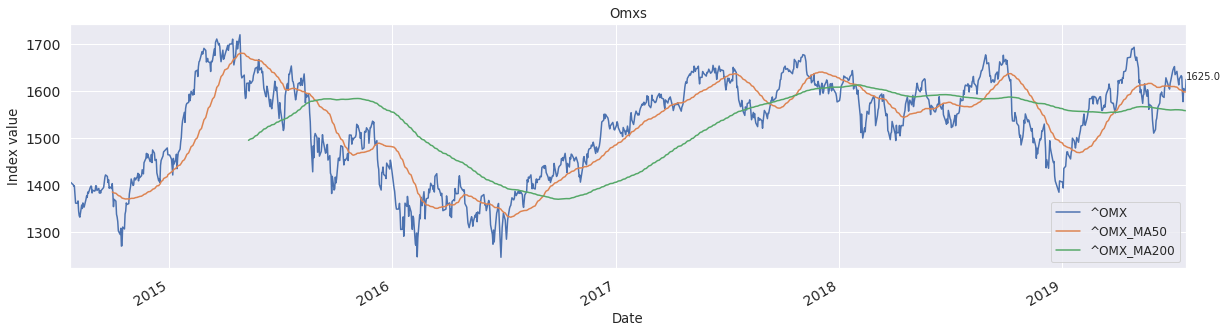

In [3]:
# Load index trace
df_index, indices = load_index_trace(time_years=5);
index = '^OMX'
df_index[[index, index + '_MA50', index + '_MA200']].plot(title='Omxs', figsize=(20, 5), fontsize=14);
plt.ylabel('Index value');
plt.text(mdates.date2num(df_index[index].iloc[-1:].index[0]), 
         round(df_index[index].iloc[-1:][0]), 
         str(round(df_index[index].iloc[-1:][0])));

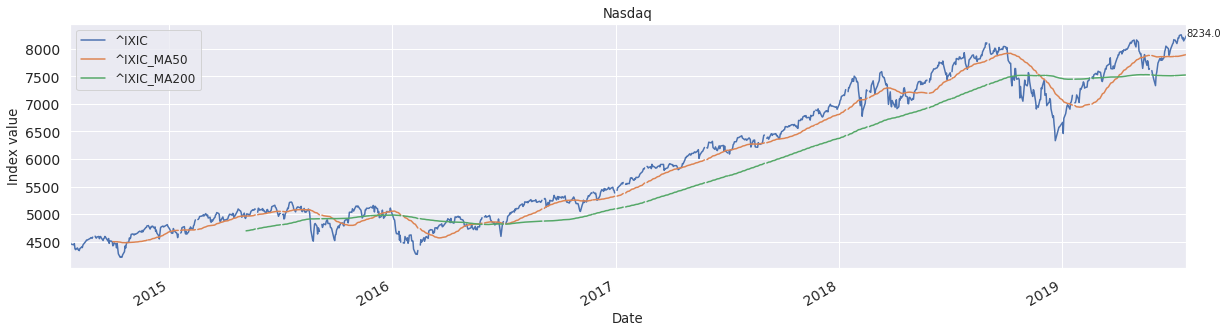

In [4]:
index = '^IXIC'
df_index[[index, index + '_MA50', index + '_MA200']].plot(title='Nasdaq', figsize=(20, 5), fontsize=14);
plt.ylabel('Index value');
plt.text(mdates.date2num(df_index[index].iloc[-1:].index[0]), 
         round(df_index[index].iloc[-1:][0]), 
         str(round(df_index[index].iloc[-1:][0])));

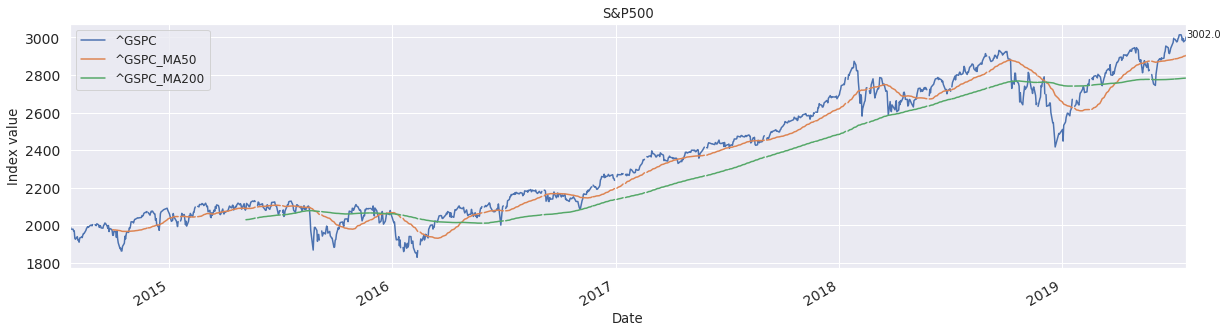

In [5]:
index = '^GSPC'
df_index[[index, index + '_MA50', index + '_MA200']].plot(title='S&P500', figsize=(20, 5), fontsize=14);
plt.ylabel('Index value');
plt.text(mdates.date2num(df_index[index].iloc[-1:].index[0]), 
         round(df_index[index].iloc[-1:][0]), 
         str(round(df_index[index].iloc[-1:][0])));

# 2 Fundamentals

This section presents some of the fundamental key-values for different stocks. Dividend yield, pe-reatios etc.

In [6]:
df = load_stocks_fundamentals()

Could not find payout ratio for GOOG
Could not find payout ratio for AMZN


In [7]:
df.columns

Index(['kortnamn', 'dividend_yield', 'pe_ratio', 'eps', 'market_cap',
       'dividend/earnings', 'ncavps', 'net_cash_ps', 'price_book',
       'antal_aktier'],
      dtype='object')

### 2.1 Dividend yield
In this section is the dividend yield presented. The dividend yield is defined as the amount of dividends payed divided by the share price.

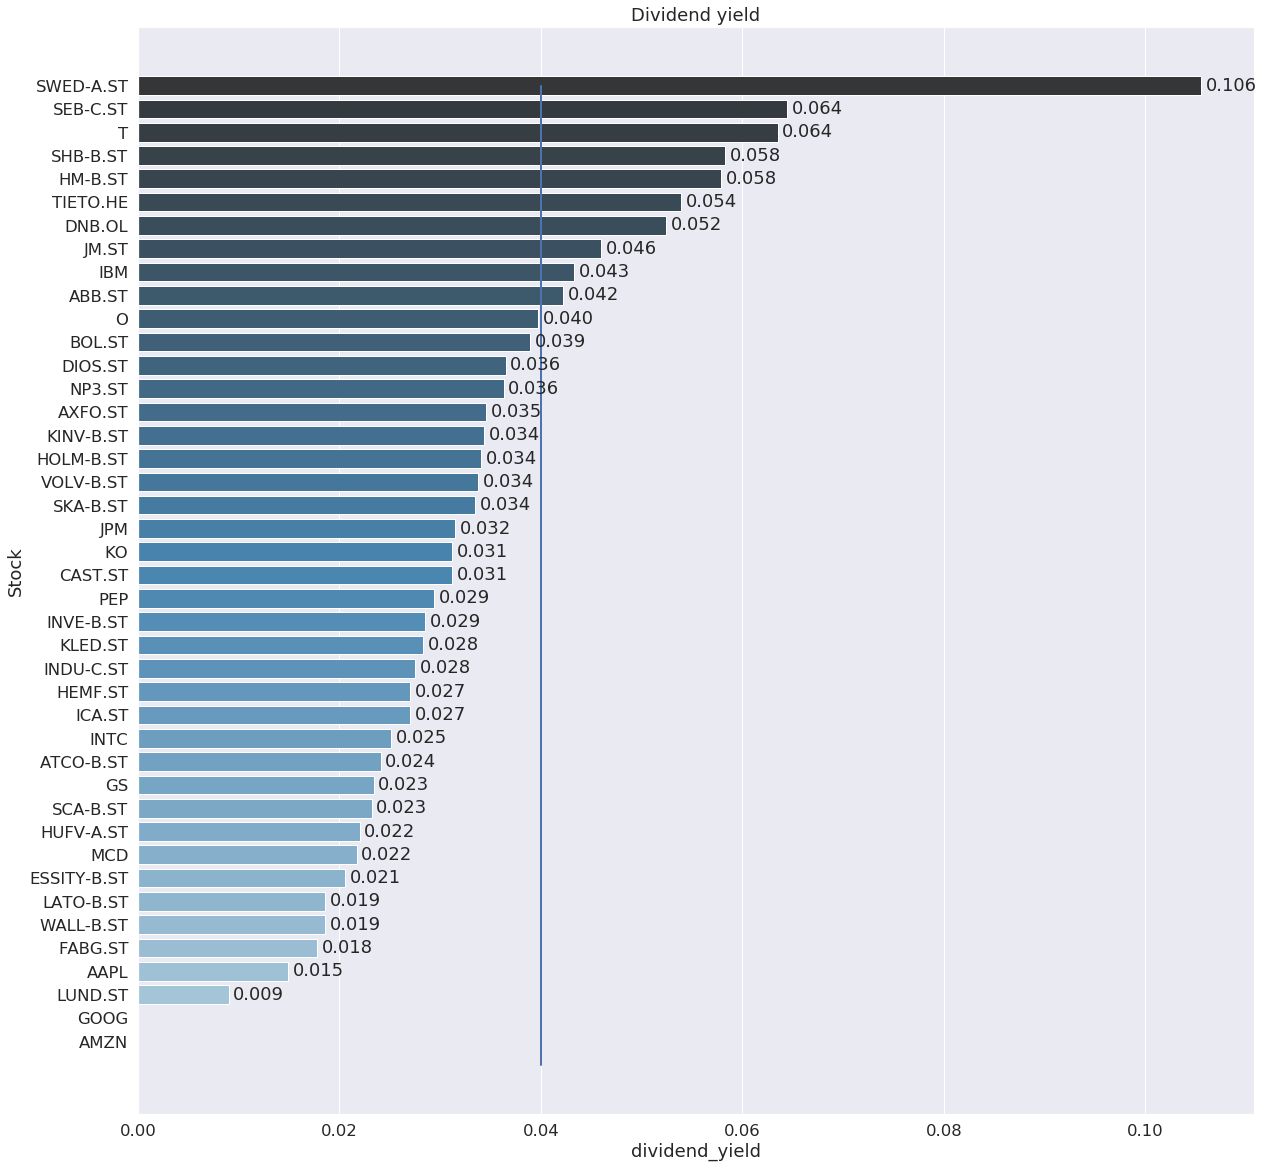

In [8]:
plt.figure(figsize=(20, 20))
sns.set(font_scale=1.5)
df = df.sort_values(by=['dividend_yield'], ascending=False)
ax = sns.barplot(x='dividend_yield', y='kortnamn', data=df, palette="Blues_d");
plt.plot([0.040, 0.040], [0, len(df)], linewidth=2);
plt.ylabel('Stock');
plt.title('Dividend yield')
for p in ax.patches:
    width = p.get_width()
    if np.isnan(width) == False:
        ax.text(width + 0.003,
                p.get_y()+p.get_height()/2. + 0.2,
                '{:1.3f}'.format(width), ha="center")

### 2.2 P/E ratio
The P/E ratio is defined as the share price divided by the earnings per share (EPS).

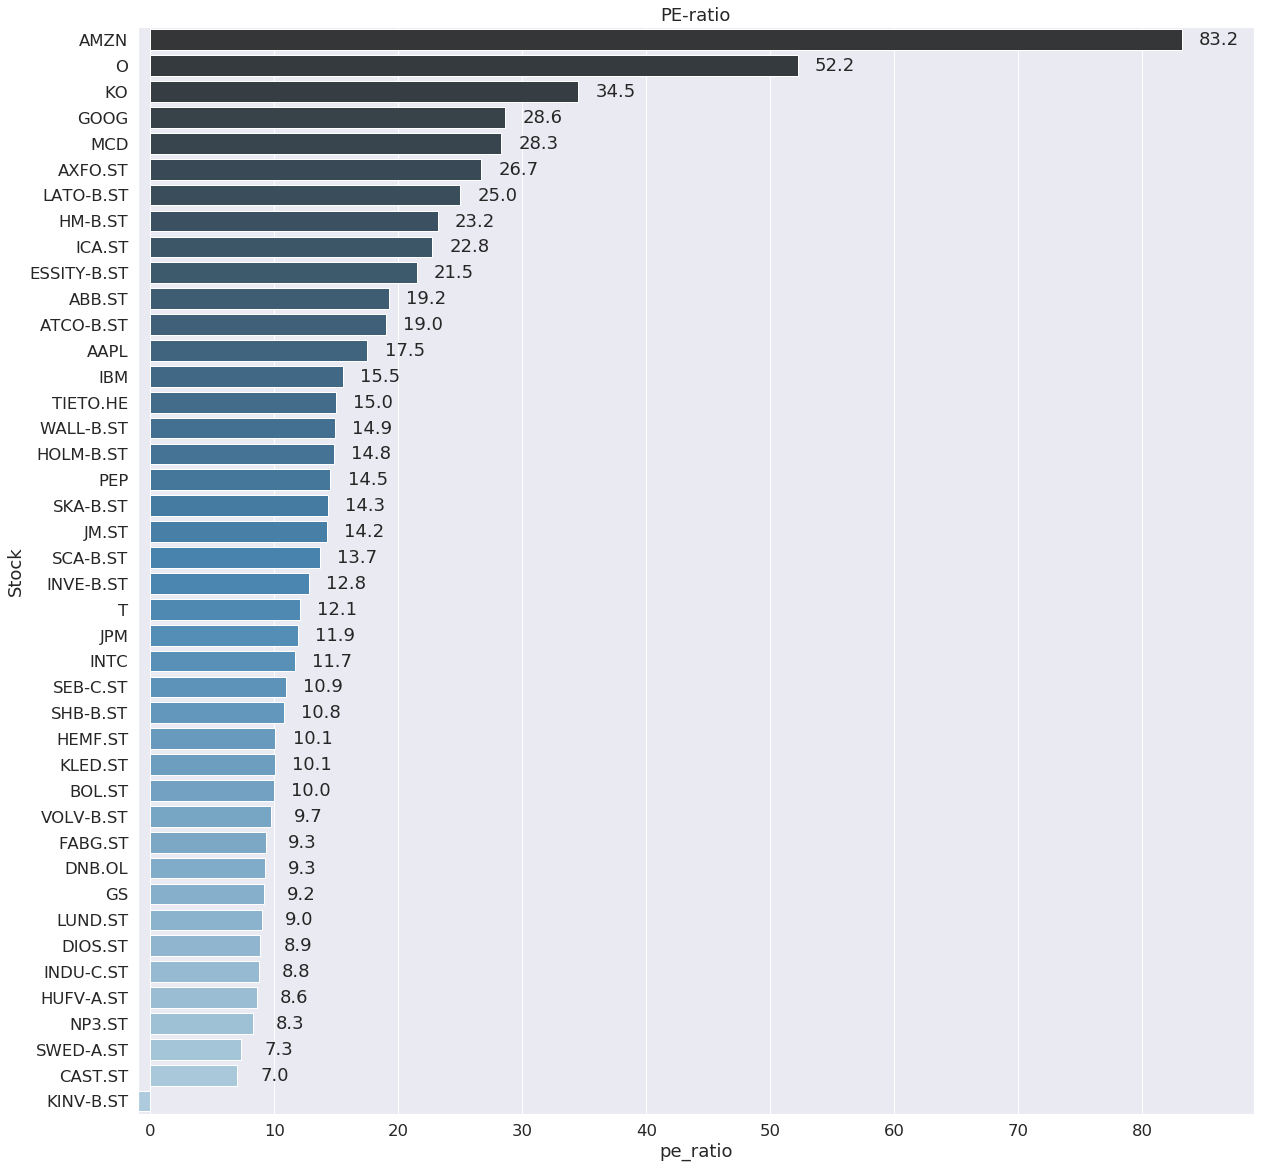

In [9]:
plt.figure(figsize=(20, 20))
df = df.sort_values(by=['pe_ratio'], ascending=False)
sns.set(font_scale=1.5)
ax = sns.barplot(x='pe_ratio', y='kortnamn', data=df, palette="Blues_d");
plt.ylabel('Stock');
plt.xlim(left=-1)
plt.title('PE-ratio')
for p in ax.patches:
    width = p.get_width()
    if np.isnan(width) == False and width > 0:
        ax.text(width + 3,
                p.get_y()+p.get_height()/2. + 0.2,
                '{:1.1f}'.format(width), ha="center")

### 2.3 Dividends/Earnings (payout ratio)
The payout ratio is interesting to look at since that further gives indication whether a high dividend yield is motivated or not. A high dividend yield might just come from the fact that the company has a low EPS (which usually gives a low share price) but still paying a high dividend, giving a high yield.

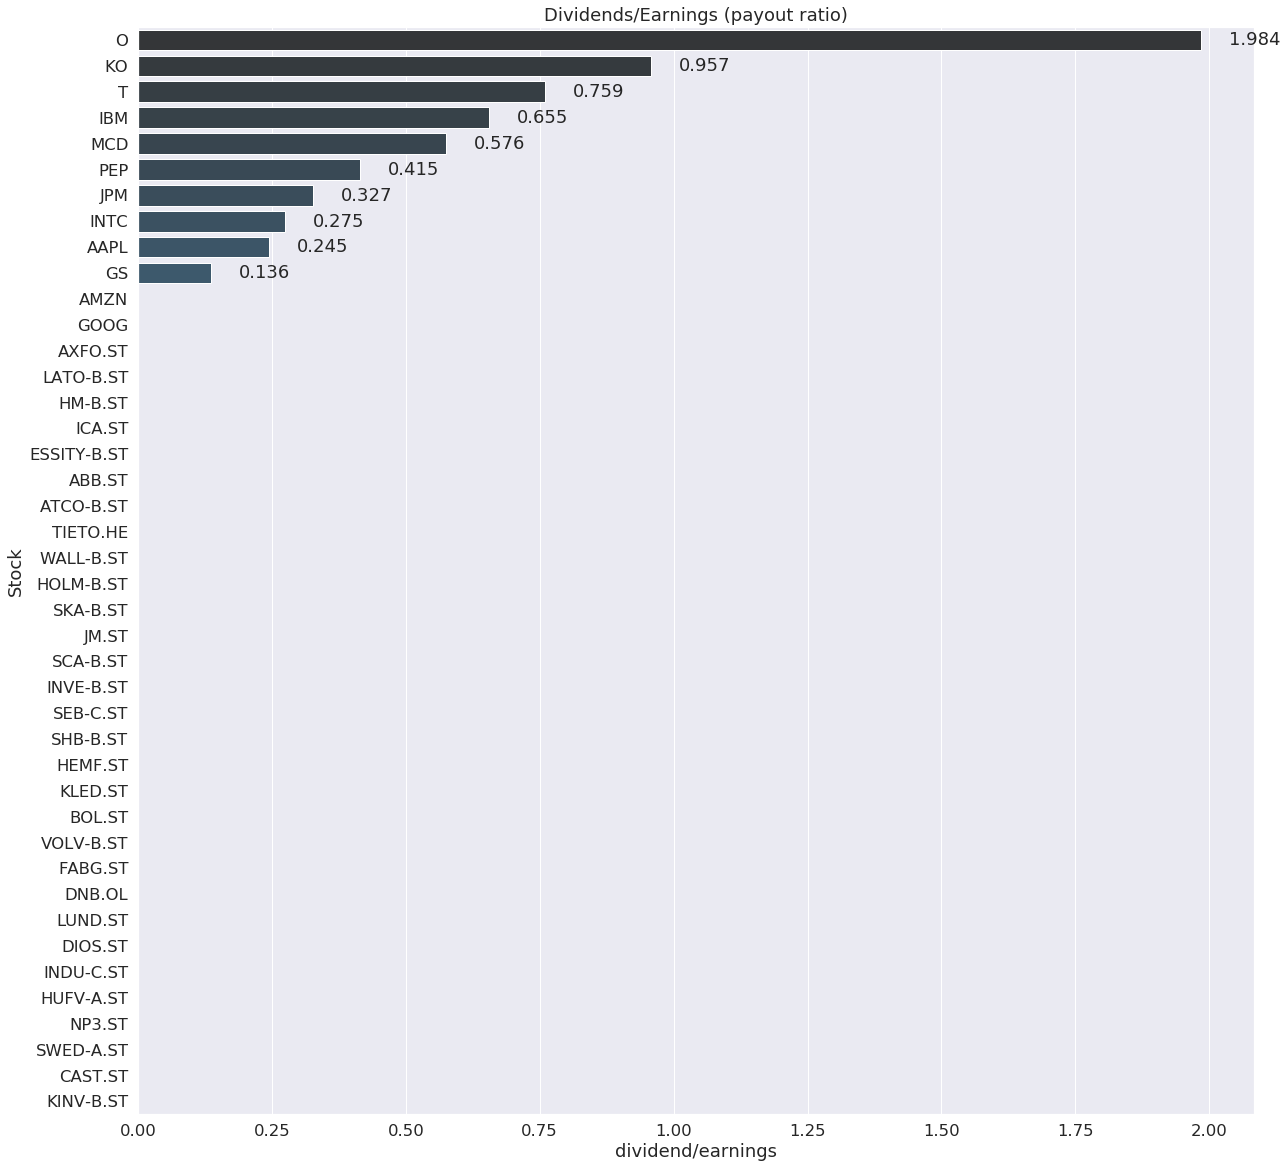

In [10]:
plt.figure(figsize=(20, 20))
sns.set(font_scale=1.5)
df = df.sort_values(by=['dividend/earnings'], ascending=False)
ax = sns.barplot(x='dividend/earnings', y='kortnamn', data=df, palette="Blues_d");
plt.ylabel('Stock');
plt.title('Dividends/Earnings (payout ratio)')
for p in ax.patches:
    width = p.get_width()
    if np.isnan(width) == False:
        ax.text(width + 0.1,
                p.get_y()+p.get_height()/2. + 0.2,
                '{:1.3f}'.format(width), ha="center")

### 2.4 Net current assets per share

In [11]:
"""
plt.figure(figsize=(15, 20))
sns.set(font_scale=1.5)
df = df.sort_values(by=['ncavps'], ascending=False)
ax = sns.barplot(x='ncavps', y='kortnamn', data=df, palette="Blues_d");
plt.xlabel('NCAVPS');
for p in ax.patches:
    width = p.get_width()
    if np.isnan(width) == False:
        ax.text(width + 1e5,
                p.get_y()+p.get_height()/2. + 0.2,
                '{:1.3f}'.format(width), ha="center")
"""

'\nplt.figure(figsize=(15, 20))\nsns.set(font_scale=1.5)\ndf = df.sort_values(by=[\'ncavps\'], ascending=False)\nax = sns.barplot(x=\'ncavps\', y=\'kortnamn\', data=df, palette="Blues_d");\nplt.xlabel(\'NCAVPS\');\nfor p in ax.patches:\n    width = p.get_width()\n    if np.isnan(width) == False:\n        ax.text(width + 1e5,\n                p.get_y()+p.get_height()/2. + 0.2,\n                \'{:1.3f}\'.format(width), ha="center")\n'

### 2.5 Net cash per share

In [12]:
"""
plt.figure(figsize=(15, 4))
df = df.sort_values(by=['net_cash_ps'], ascending=False)
ax = sns.barplot(x='kortnamn', y='net_cash_ps', data=df, palette="Blues_d");
plt.xlabel('Stock');
for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', rotation=0, xytext=(0, 8), textcoords='offset points')
for ax in ax.get_xticklabels():
    ax.set_rotation(30)
    ax.set_ha("right")"""

'\nplt.figure(figsize=(15, 4))\ndf = df.sort_values(by=[\'net_cash_ps\'], ascending=False)\nax = sns.barplot(x=\'kortnamn\', y=\'net_cash_ps\', data=df, palette="Blues_d");\nplt.xlabel(\'Stock\');\nfor p in ax.patches:\n        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),\n             ha=\'center\', va=\'center\', rotation=0, xytext=(0, 8), textcoords=\'offset points\')\nfor ax in ax.get_xticklabels():\n    ax.set_rotation(30)\n    ax.set_ha("right")'

### 2.6 Price/book 

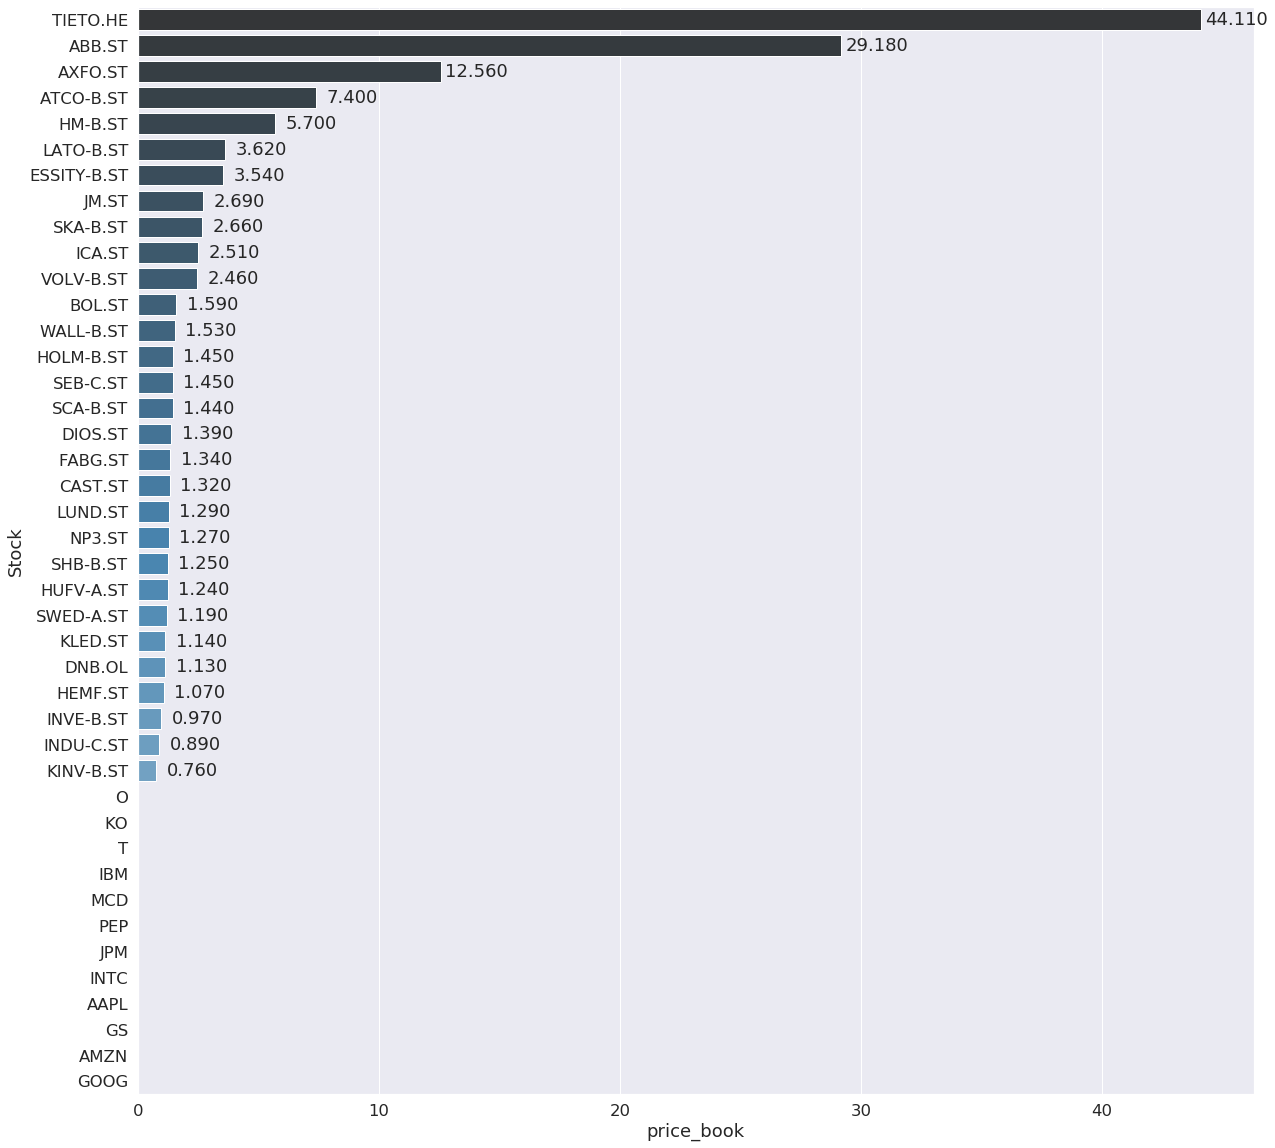

In [13]:
plt.figure(figsize=(20, 20))
sns.set(font_scale=1.5)
df = df.sort_values(by=['price_book'], ascending=False)
ax = sns.barplot(x='price_book', y='kortnamn', data=df, palette="Blues_d");
plt.ylabel('Stock');
for p in ax.patches:
    width = p.get_width()
    if np.isnan(width) == False:
        ax.text(width + 1.5,
                p.get_y()+p.get_height()/2. + 0.2,
                '{:1.3f}'.format(width), ha="center")

# 3 Appendix

In this appendix, the price for various stocks are presented.

## 3.1 Appendix A
### Stock fundamentals, filtered

## 3.2 Appendix B: Stock traces
The traces for the last 5 years is presented in a one-by-one style.

In [14]:
df_trace = load_stocks_trace(time_years=5);

[*********************100%***********************]  34 of 34 downloaded


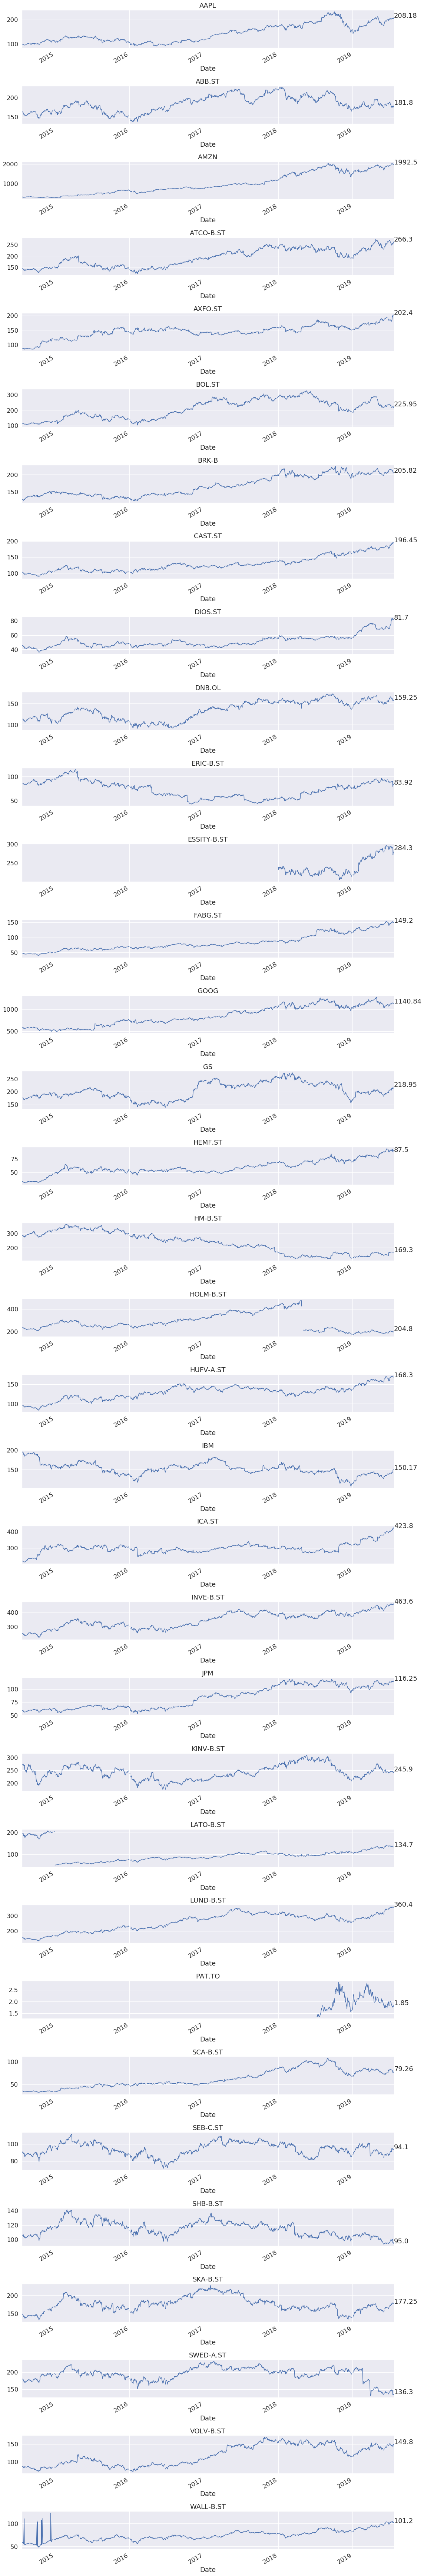

In [15]:
import math
fig, ax = plt.subplots(len(df_trace.columns), sharex=False, figsize=(18, 140))
log = False
import numpy as np  
for idx, stock in enumerate(df_trace): 
    df_trace[stock].plot(ax=ax[idx], logy=log)
    ax[idx].set_title(stock)
    x = df_trace[stock].iloc[-1:].index[0]
    y = round(df_trace[stock].iloc[-1:][0] ,2)
    # print(x, math.isnan(y), stock) Check if latest days closing is available
    if math.isnan(y) == False:
        ax[idx].text(x, y, str(round(df_trace[stock].iloc[-1:][0], 2)))

fig.subplots_adjust(hspace=1)
plt.show()

## 3.3 Appendix C: Dividend months
The dividends are presented as a normalized bar over the year. E.g., a company paying everything once per year will have a bar at 1.0. A company paying dividends 4 different months per year will have 4 bars in different months being 0.25. Personally, I try to not focus to much when the dividends are payed out. Logically this would just add another parameter that further increases the complexity on which stock to buy. However, it is very convenient to have an even (monthly) cash flow by buying stocks that pays different months.

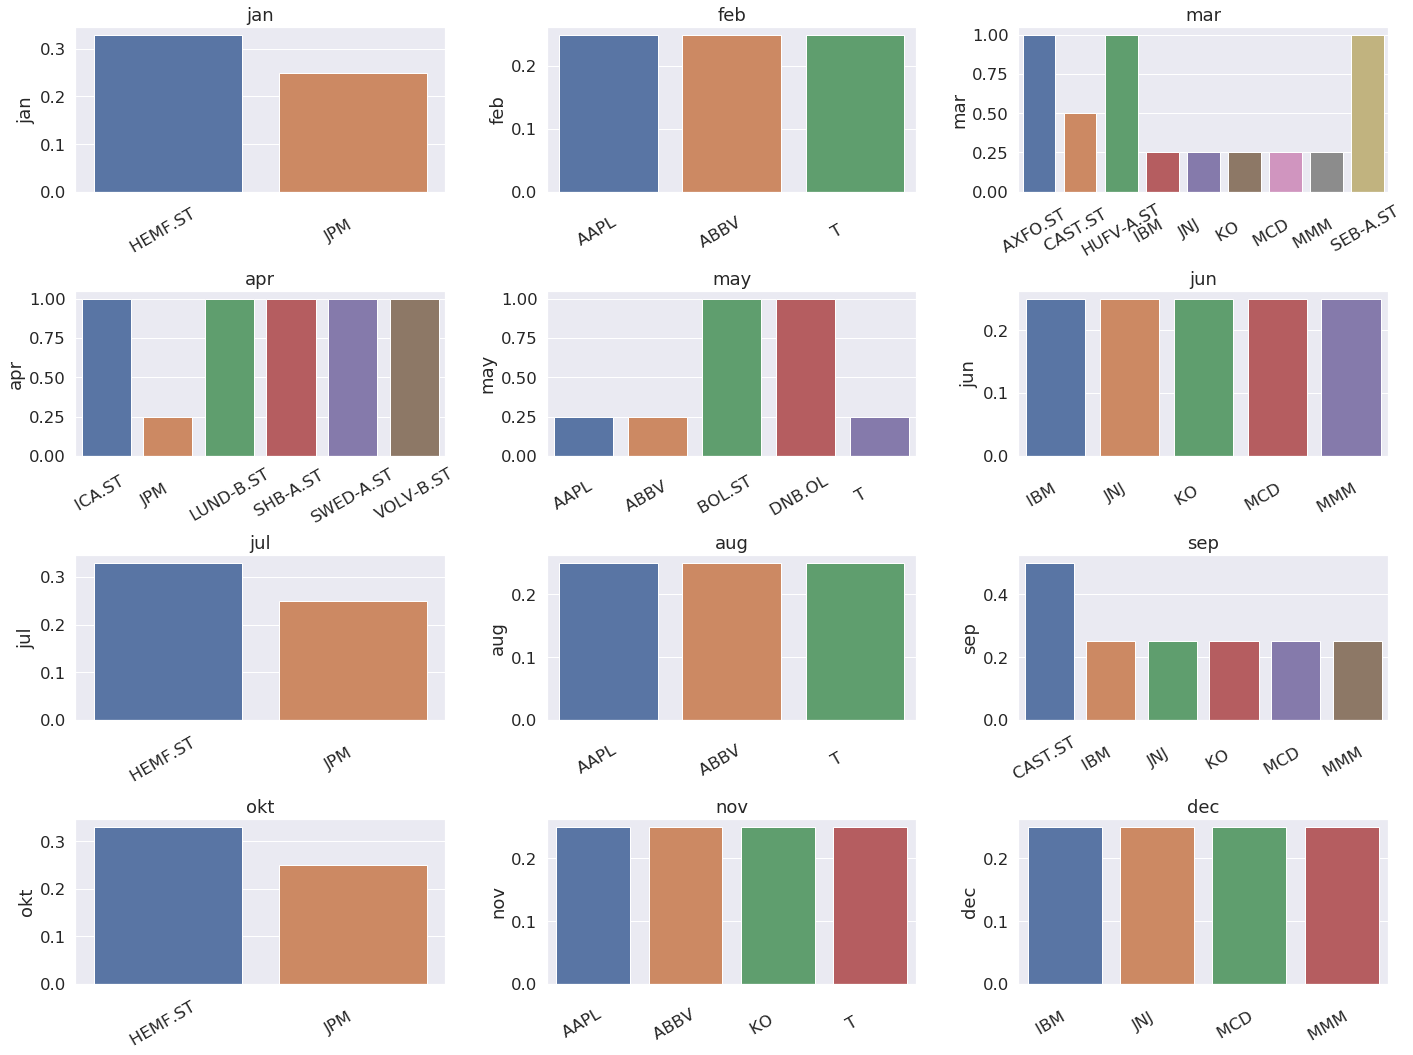

In [16]:
    file = "lib/dividend_months.csv"
    df_div_months = load_div_months_csv_2(file)
    plt = load_div_months_plot_2(df_div_months)
    plt.show()

## 3.4 Appendix D: Dividend aristocrats
In this section the US dividend aristocrats are presented. The list is defined by the stocks in S&P 500 that for at least the latest 25 years been able to raise the dividend annually. The growth rate is calculated as a 5 year annual average.

In [17]:
dff = get_div_artist()
print(dff.head(100))

                                Name   TIC   Yield   Growth
0                               AT&T     T   6.31%    2.20%
1                             AbbVie  ABBV   5.44%   17.04%
2                         ExxonMobil   XOM   4.68%    7.55%
3                    Cardinal Health   CAH   4.31%  -27.04%
4                    Leggett & Platt   LEG   4.28%    4.27%
5                           Chevron    CVX   3.94%    6.23%
6                                 3M   MMM   3.46%   10.92%
7             Archer-Daniels-Midland   ADM   3.43%    9.60%
8           Walgreens Boots Alliance   WBA   3.35%   14.56%
9                Consolidated Edison    ED   3.34%    2.29%
10                         Coca-Cola    KO   3.12%    6.90%
11                Franklin Resources   BEN   3.12%   14.82%
12                           Emerson   EMR   3.12%    4.03%
13                             Nucor   NUE   3.09%    1.34%
14   Federal Realty Investment Trust   FRT   3.06%    4.61%
15                    Kimberly-Clark   K